In [1]:
# global var set
import transformers

# model info, change as needed
# model_checkpoint = "roberta-base"
model_checkpoint = 'roberta-large'#distilbert-base-uncased-finetuned-sst-2-english
batch_size = 8
num_epochs = 10

# fileTag = "clean-v1"                      # clean + no phase + combine    (pure clean)
fileTag = "clean-phase-v1"                # clean +   phase  + combine
#fileTag = 'clean-phase-noCombin-v1'       # clean +   phase  + no combine
#fileTag = 'original-noCheat-noCombin-v1'  # raw   +   no Cheat case
#fileTag = 'original'                        # row   +   keep Cheat case     (pure raw) 

fileTag
model_checkpoint

'roberta-large'

# Convert dataset to suitable format
IMPORTANT: please never run this section again if you have your dataset ready!

In [14]:
import pandas as pd
from pandas import DataFrame

trainDatasetOriginal = pd.read_csv(f'../../data/csv_version/dev/emotion/allcharlinepairs-{fileTag}.csv')
testDatasetOriginal = pd.read_csv(f'../../data/csv_version/test/emotion/allcharlinepairs-{fileTag}.csv')

In [8]:
trainDatasetProcessed = DataFrame({'emotion' : trainDatasetOriginal['emotion'],
                                   'plutchik' : trainDatasetOriginal['plutchik'],
                                  'selection0': pd.concat([trainDatasetOriginal['sentence'][:trainDatasetOriginal.shape[0]//3], trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//3:]]), 
                                  'selection1': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//3], 
                                                pd.concat([trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//3 : trainDatasetOriginal.shape[0]//3*2], 
                                                           trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//3*2:]])]), 
                                  'selection2': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//3*2], 
                                                           trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//3*2:]]),
                                  'label': pd.Series(0 if x < trainDatasetOriginal.shape[0]//3 else (1 if x < trainDatasetOriginal.shape[0]//3*2 else 2) for x in trainDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)

testDatasetProcessed = DataFrame({'emotion' : testDatasetOriginal['emotion'],
                                   'plutchik' : testDatasetOriginal['plutchik'],
                                  'selection0': pd.concat([testDatasetOriginal['sentence'][:testDatasetOriginal.shape[0]//3], testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//3:]]), 
                                  'selection1': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//3], 
                                                pd.concat([testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//3 : testDatasetOriginal.shape[0]//3*2], 
                                                testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//3*2:]])]), 
                                  'selection2': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//3*2], 
                                                           testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//3*2:]]),
                                  'label': pd.Series(0 if x < testDatasetOriginal.shape[0]//3 else (1 if x < testDatasetOriginal.shape[0]//3*2 else 2) for x in testDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)

In [9]:
trainDatasetProcessed.to_csv(f'./dataset/3Select-{fileTag}-train.csv')
trainDatasetProcessed

,emotion,plutchik,selection0,selection1,selection2,label
0,['none'],"{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",I played hide and seek with my friends the oth...,Dan decided to incorporate more fresh vegetabl...,The roof started coming off the school.,2
1,['excited'],"{'joy': 3, 'trust': 3, 'fear': 0, 'surprise': ...",Ed and his wife Jean live in New Hampshire.,The game was getting close and nerve racking.,They were psyched for the big game!,2
2,"['determined', 'passionate']","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",Jill wanted to bring back the passion into her...,"Running over to them, they all ran away except...",His favorite activity was the kids crafts.,0
3,['disgusted'],"{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...","But when she got home, a dozen people yelled S...",He found a sweatshirt to cover himself and wen...,She didn't miss any on the rest of the drive h...,1
4,['frustrated'],"{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",The bunny slept by the lake.,Unfortunately nobody else agreed.,"Years later, Jane and husband still laughed at...",1
...,...,...,...,...,...,...
53113,['none'],"{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",Anna was making a rice-based dish for her fami...,He had a great time with his dad at the range ...,"Suddenly, she realized that the pianist was he...",2
53114,['upset'],"{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",I have nicknamed it 'Moody'.,She was toward the middle of the group.,He prepared himself for anything.,1
53115,"['stressed.', 'excited', 'hopeful']","{'joy': 2, 'trust': 0, 'fear': 2, 'surprise': ...",Stacey was waiting for her test results.,Alan and his brother spent the day turning the...,She scoured the house for all the money she co...,2
53116,['disappointed'],"{'joy': 0, 'trust': 2, 'fear': 0, 'surprise': ...",Remy reluctantly ate the chocolate cake.,Daniel's dad told him it would be a good idea ...,His parents promised to help him through it.,1


In [10]:
testDatasetProcessed.to_csv(f'./dataset/3Select-{fileTag}-test.csv')
testDatasetProcessed

,emotion,plutchik,selection0,selection1,selection2,label
0,"[""mature. ""]","{'joy': 0, 'trust': 2, 'fear': 0, 'surprise': ...",He got a paper route on Fridays and Saturdays.,Tom and Jim had a huge tree in their backyard.,Beth was talking to may when Ali started fight...,0
1,"[""scared""]","{'joy': 0, 'trust': 0, 'fear': 3, 'surprise': ...",He sees a spider cross the floor.,He thought he knew the man.,"One day, he saw his desk was broken.",0
2,"[""upset""]","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",Clair hated her hair.,"Upset, Laura stormed into her room and slammed...",Bob decided to tell her.,1
3,"[""proud""]","{'joy': 3, 'trust': 0, 'fear': 0, 'surprise': ...",Tommy's coach was beyond proud of him.,Now she will nap until the late afternoon.,"With bankruptcy proceedings underway, Bill fel...",0
4,"[""happy""]","{'joy': 2, 'trust': 0, 'fear': 0, 'surprise': ...","Silently, Joan used the knife to make an incis...",During the movie the couple behind them talked...,Tom had a garden.,2
...,...,...,...,...,...,...
51886,"[""stressed""]","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",He cruised around for a while.,Beth wanted to go to her friend May's house.,The dogs did like one single thing that they d...,0
51887,"[""depressed""]","{'joy': 0, 'trust': 0, 'fear': 2, 'surprise': ...","Without sugar, I don't drink coffee.","I never tell him not to, but it bothers me a lot.",She said she was not going to apply for the jo...,2
51888,"[""happy""]","{'joy': 3, 'trust': 2, 'fear': 0, 'surprise': ...",The company had not been doing so well lately.,There was a swordsmith named Charles with no w...,Joanna was thrilled to have a kitten and her d...,2
51889,"[""relieved""]","{'joy': 3, 'trust': 3, 'fear': 0, 'surprise': ...",She kept Maggie until she passed away.,His road to success had started and he was bri...,I was thankful to continue working for him.,2


# load dataset

In [2]:
from datasets import load_dataset, load_metric

In [3]:
dataset = load_dataset('csv', data_files={'train': f'./dataset/3Select-{fileTag}-train.csv', 
                                           'test': f'./dataset/3Select-{fileTag}-test.csv'})

Using custom data configuration default-0fd697d003d3d306


Dataset csv downloaded and prepared to C:\Users\evans\.cache\huggingface\datasets\csv\default-0fd697d003d3d306\0.0.0\2dc6629a9ff6b5697d82c25b73731dd440507a69cbce8b425db50b751e8fcfd0. Subsequent calls will reuse this data.


In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'selection2', 'label'],
        num_rows: 11610
    })
    test: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'selection2', 'label'],
        num_rows: 11129
    })
})

In [5]:
dataset['test'][0]

{'Unnamed: 0': 0,
 'emotion': "['happy', 'grateful', 'pleasant', 'appreciative', 'helpful', 'useful', 'accomplished']",
 'label': 0,
 'plutchik': "{'joy': 2, 'trust': 1, 'fear': 0, 'surprise': 0, 'sadness': 0, 'disgust': 0, 'anger': 0, 'anticipation': 1}",
 'selection0': 'He taught the kids all the skills they needed to know.',
 'selection1': 'I had a stepmother and a stepfather, both of which disliked me.',
 'selection2': 'He would always do research related to cats.'}

In [6]:
def show_one(example):
    print(f"Context: {example['emotion']}")
    print(f"  A - {example['selection0']}")
    print(f"  B - {example['selection1']}")
    print(f"  C - {example['selection2']}")
    print(f"\nGround truth: option {['A', 'B', 'C'][example['label']]}")

In [7]:
show_one(dataset["train"][1])

Context: ['justified', 'productive']
  A - He heads to the bar to feel better.
  B - So Carlos started to clean it.
  C - She stared at the traffic happy to have made her escape.

Ground truth: option B


# Preprocessing Data

In [8]:
from transformers import AutoTokenizer
    
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

In [9]:
selectionList = ["selection0", "selection1", "selection2"]

def preprocess_function(examples):
    # Repeat each first sentence four times to go with the four possibilities of second sentences.
    first_sentences = [["The following sentences contain emotions: {}".format(context.strip("[").strip("]").replace('\'', '')) ]*3 for context in examples["emotion"]]
    # Grab all second sentences possible for each context.
    second_sentences = [[examples[selection][index] for selection in selectionList] for index in range(len(examples['selection0']))]

    # Flatten everything
    first_sentences = sum(first_sentences, [])
    second_sentences = sum(second_sentences, [])
    
    # Tokenize
    tokenized_examples = tokenizer(first_sentences, second_sentences, truncation=True)
    # Un-flatten
    # print(tokenized_examples.items())
    return {k: [v[i:i+3] for i in range(0, len(v), 3)] for k, v in tokenized_examples.items()}

In [10]:
examples = dataset["train"][:5]
features = preprocess_function(examples)
print(len(features["input_ids"]), len(features["input_ids"][0]), [len(x) for x in features["input_ids"][0]])

5 3 [32, 32, 31]


In [11]:
[tokenizer.decode(features["input_ids"][a][i]) for a in range(5) for i in range(3) ]

['<s>The following sentences contain emotions: sad, annoyed, tired, unperturbed</s></s>Theresa came home from a bonfire covered in mosquito bites.</s>',
 '<s>The following sentences contain emotions: sad, annoyed, tired, unperturbed</s></s>Thomas is fairly introverted so Maria invited him to a party.</s>',
 '<s>The following sentences contain emotions: sad, annoyed, tired, unperturbed</s></s>Sam reminded them that he had asked not to have those.</s>',
 '<s>The following sentences contain emotions: justified, productive</s></s>He heads to the bar to feel better.</s>',
 '<s>The following sentences contain emotions: justified, productive</s></s>So Carlos started to clean it.</s>',
 '<s>The following sentences contain emotions: justified, productive</s></s>She stared at the traffic happy to have made her escape.</s>',
 '<s>The following sentences contain emotions: annoyed, clumsy, embarrassed, silly</s></s>We were frightened of the fast moving river.</s>',
 '<s>The following sentences cont

In [12]:
encoded_datasets = dataset.map(preprocess_function, batched=True)

# Fine-tuning the model

In [13]:
from transformers import AutoModelForMultipleChoice, TrainingArguments, Trainer

model = AutoModelForMultipleChoice.from_pretrained(model_checkpoint)

Some weights of the model checkpoint at roberta-large were not used when initializing RobertaForMultipleChoice: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForMultipleChoice from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMultipleChoice from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultipleChoice were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for pre

In [14]:
model_name = model_checkpoint.split("/")[-1]
args = TrainingArguments(
    f"{model_name}-finetuned-emotionCommonsense",
    evaluation_strategy = "epoch",
    #learning_rate=5e-5, # for bert-base
    learning_rate=5e-7, # for roberta-base
    # learning_rate=1e-3,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=0.01,
    push_to_hub=False,
    save_total_limit=1,
)

In [15]:
from dataclasses import dataclass
from transformers.tokenization_utils_base import PreTrainedTokenizerBase, PaddingStrategy
from typing import Optional, Union
import torch

@dataclass
class DataCollatorForMultipleChoice:
    """
    Data collator that will dynamically pad the inputs for multiple choice received.
    """

    tokenizer: PreTrainedTokenizerBase
    padding: Union[bool, str, PaddingStrategy] = True
    max_length: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None

    def __call__(self, features):
        label_name = "label" if "label" in features[0].keys() else "labels"
        labels = [feature.pop(label_name) for feature in features]
        batch_size = len(features)
        num_choices = len(features[0]["input_ids"])
        flattened_features = [[{k: v[i] for k, v in feature.items()} for i in range(num_choices)] for feature in features]
        flattened_features = sum(flattened_features, [])
        
        batch = self.tokenizer.pad(
            flattened_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )
        
        # Un-flatten
        batch = {k: v.view(batch_size, num_choices, -1) for k, v in batch.items()}
        # Add back labels
        batch["labels"] = torch.tensor(labels, dtype=torch.int64)
        return batch

In [16]:
accepted_keys = ["input_ids", "attention_mask", "label"]
features = [{k: v for k, v in encoded_datasets["train"][i].items() if k in accepted_keys} for i in range(10)]
batch = DataCollatorForMultipleChoice(tokenizer)(features)

In [17]:
[tokenizer.decode(batch["input_ids"][8][i].tolist()) for i in range(3)]

['<s>The following sentences contain emotions: nervous, happy, excited, reminiscent, nostalgic</s></s>Gina would have to help her watch the kids.</s><pad><pad><pad><pad><pad><pad>',
 '<s>The following sentences contain emotions: nervous, happy, excited, reminiscent, nostalgic</s></s>I added several sprinkles to it as well.</s><pad><pad><pad><pad><pad><pad><pad>',
 '<s>The following sentences contain emotions: nervous, happy, excited, reminiscent, nostalgic</s></s>I went on amazing date with a man named Chris when I was 22.</s><pad><pad>']

In [18]:
show_one(dataset["train"][8])

Context: ['nervous', 'happy', 'excited', 'reminiscent', 'nostalgic']
  A - Gina would have to help her watch the kids.
  B - I added several sprinkles to it as well.
  C - I went on amazing date with a man named Chris when I was 22.

Ground truth: option C


# Trainer Defined

In [19]:
import numpy as np

valStored = []
def compute_metrics(eval_predictions):
    predictions, label_ids = eval_predictions
    preds = np.argmax(predictions, axis=1)
    valStored.append((preds != label_ids).astype(np.float32));
    return {"accuracy": (preds == label_ids).astype(np.float32).mean().item()}

In [20]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_datasets["train"],
    eval_dataset=encoded_datasets["test"],
    tokenizer=tokenizer,
    data_collator=DataCollatorForMultipleChoice(tokenizer),
    compute_metrics=compute_metrics,
)

In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

NVIDIA GeForce RTX 3090
Memory Usage:
Allocated: 1.3 GB
Cached:    1.3 GB


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,1.101700,1.097013,0.393387
2,1.001900,0.653481,0.737712
3,0.653600,0.541029,0.793962
4,0.543700,0.484305,0.819660
5,0.489300,0.439369,0.835834
6,0.464700,0.419170,0.843382
7,0.414700,0.423210,0.848144
8,0.403000,0.420575,0.850750
9,0.400800,0.418184,0.853356


出现validation loss 上升情况大多是训练集验证集数据分布不一致，或者训练集过小，未包含验证集中所有情况，
也就是过拟合导致的。而解决这种现象可以尝试以下几种策略：
1. 增加训练样本增加正则项系数权重，
2. 减小过拟合加入早停机制，ValLoss上升几个epoch直接停止
3. 采用Focal Loss
4. 加入Label Smoothing

# Store Value

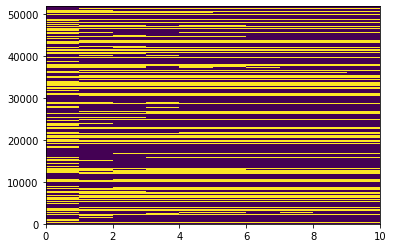

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

Z = np.transpose(valStored)

fig, ax = plt.subplots()
ax.pcolormesh(Z)

In [29]:
import pandas as pd

dataLog = pd.DataFrame(trainer.state.log_history)
dataLog.to_csv(f'./trainingMetric/[Emotion] 3Select/TI-{model_checkpoint}-{fileTag}.csv')

In [30]:
evaluationIterationResult = pd.DataFrame(np.transpose(valStored))
evaluationIterationResult.to_csv(f'./trainingMetric/[Emotion] 3Select/ESI-{model_checkpoint}-{fileTag}.csv')